In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [3]:
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dftrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dftrain.drop(["Id"],axis=1,inplace=True)
dftest.drop(["Id"],axis=1,inplace=True)

In [6]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#delete feauture with so many missing values

dftrain.drop(["Alley","FireplaceQu","Fence","PoolQC","MiscFeature"],axis=1,inplace=True)
dftest.drop(["Alley","FireplaceQu","Fence","PoolQC","MiscFeature"],axis=1,inplace=True)

In [8]:
#filling the nan value for both numeric and categorial values


from statistics import mean , mode
# Select numeric columns.
numtrain = dftrain.select_dtypes('number')
numtest = dftest.select_dtypes('number')
# Select string and object columns.
objtrain = dftrain.select_dtypes('object')
objtest = dftest.select_dtypes('object')
# Fill numeric columns with mean.
dftrain[numtrain.columns] = numtrain.fillna(numtrain.mean())
dftest[numtest.columns] = numtest.fillna(numtest.mean())
# Fill object columns with mode.
dftrain.fillna(dftrain[objtrain.columns].mode().iloc[0], inplace=True)
dftest.fillna(dftest[objtrain.columns].mode().iloc[0], inplace=True)   

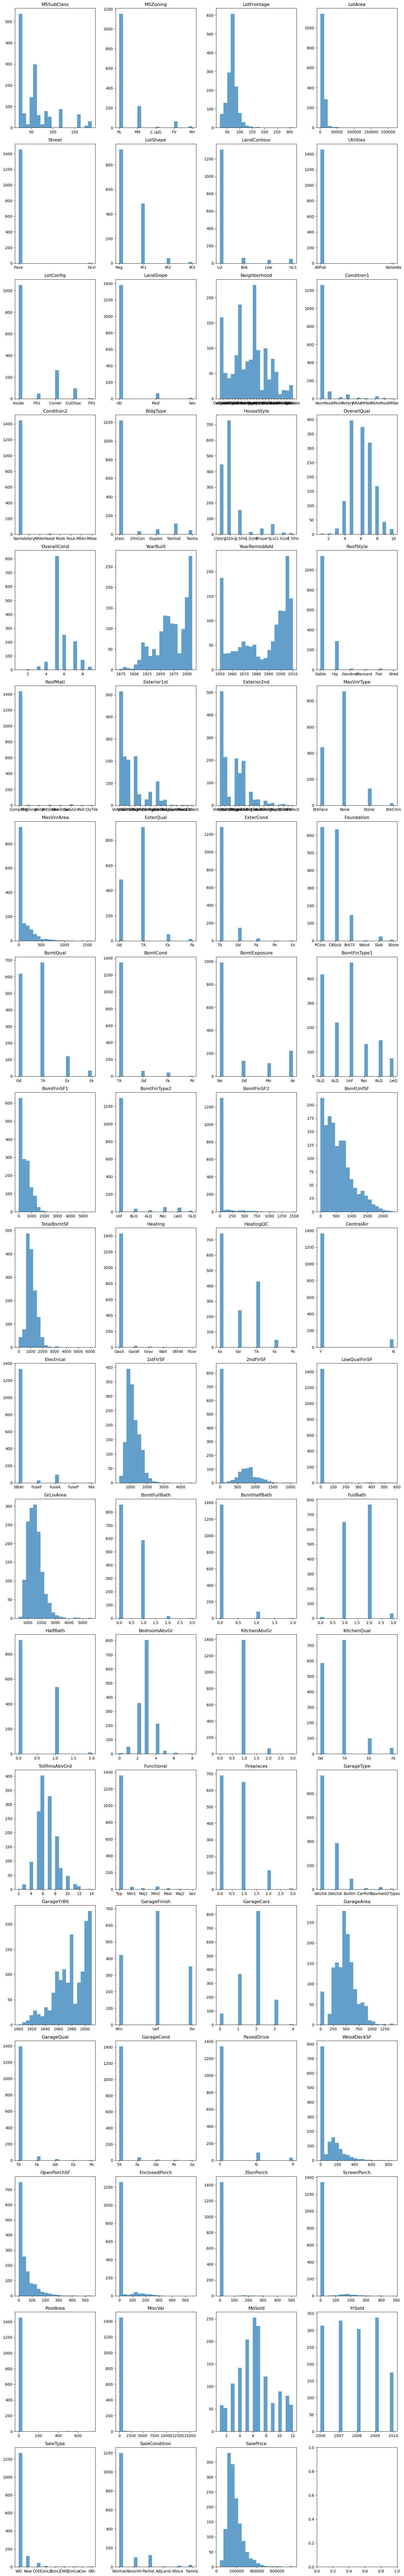

In [9]:
#check distribution of numeric values
featurenames = dftrain.columns.tolist()

# Set the number of columns for the grid layout
num_cols = 4

# Calculate the number of rows needed based on the number of features and the number of columns
num_rows = (len(featurenames) - 1) // num_cols + 1

# Create subplots with the desired grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axs array to iterate through all subplots
axs = axs.flatten()

# Plot histograms for each feature in the DataFrame
for i, feature in enumerate(featurenames):
    axs[i].hist(dftrain[feature], bins=20, alpha=0.7)
    axs[i].set_title(feature)

# Adjust the spacing between subplots for better readability
plt.tight_layout()



In [10]:
#the distrubion for  MasVnrArea,BsmtUnfSF,BsmtFinSF1,GarageYrBlt,OpenPorchSF is very skewed so remove those feautres
dftrain.drop(["MasVnrArea","BsmtUnfSF","BsmtFinSF1","GarageYrBlt","OpenPorchSF"],axis=1,inplace=True)
dftest.drop(["MasVnrArea","BsmtUnfSF","BsmtFinSF1","GarageYrBlt","OpenPorchSF"],axis=1,inplace=True)

Text(0, 0.5, 'Features')

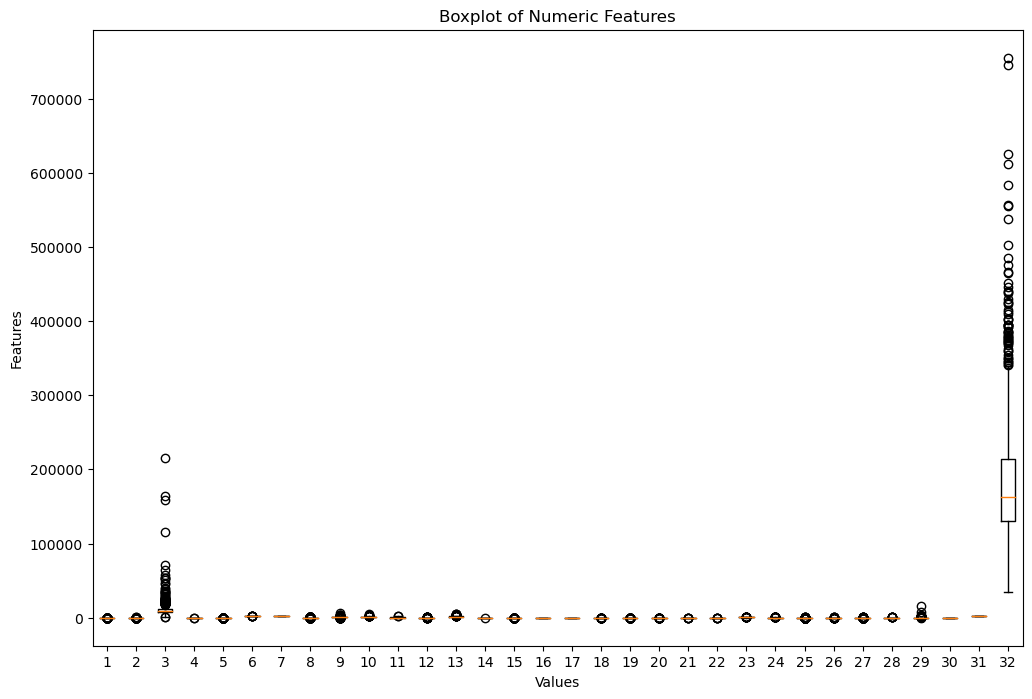

In [11]:
#check for outliners
numeric_feature_names = dftrain.select_dtypes(include='number')



# Create the boxplot
plt.figure(figsize=(12, 8))  # Set the figure size if needed
plt.boxplot(numeric_feature_names,)  

# Set the plot title and labels if needed
plt.title('Boxplot of Numeric Features')
plt.xlabel('Values')
plt.ylabel('Features')

In [12]:
numeric_feature_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [13]:
#so in numercic columns we dont have too much outliners so keep the outliners except OverallQual


dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<AxesSubplot:>

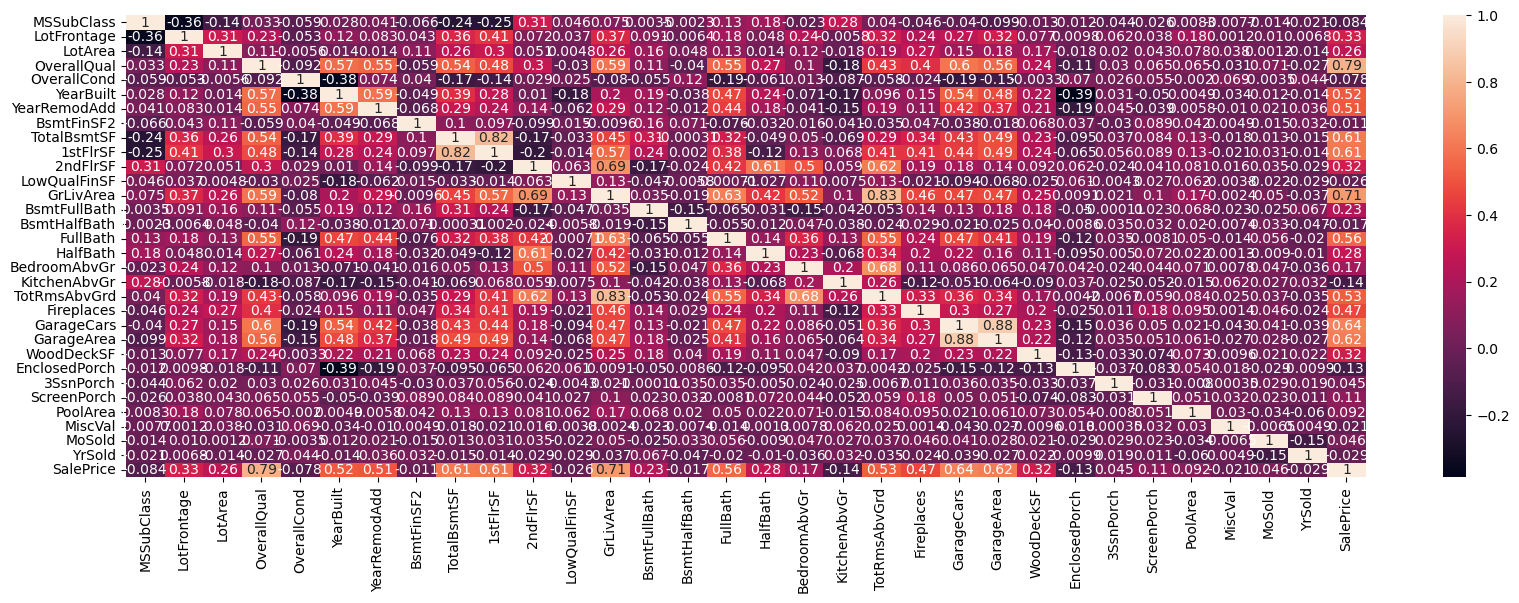

In [14]:
#check for correlation of variables together


plt.figure(figsize=(20,6))
sns.heatmap(data=dftrain.corr(),annot=True)

In [15]:
#Garage Cars and Garage Area has high correlation so remove GarageCars
dftrain.drop(["GarageCars"],axis=1,inplace=True)
dftest.drop(["GarageCars"],axis=1,inplace=True)

In [28]:
# Select string and object columns.
objtrain2 = dftrain.select_dtypes('object')
objtest2 = dftest.select_dtypes('object')
column_names = objtrain2.columns.tolist()
print(column_names)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [29]:
dumtrain=pd.get_dummies(dftrain,columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
               ,drop_first = True)
dumtest=pd.get_dummies(dftest,columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first = True)

In [30]:
dumtrain.info()
dumtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 227 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(1), int64(30), uint8(196)
memory usage: 633.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 210 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(6), int64(24), uint8(180)
memory usage: 598.5 KB


In [32]:
#Reconcile the features
#  Get the columns in each dataframe
train_columns = dumtrain.columns.tolist()
test_columns = dumtest.columns.tolist()
#find the missing columns
missing_columns_test = set(train_columns) - set(test_columns)
salecolumns=dumtrain["SalePrice"]
dumtest2=dumtest.reindex(columns=test_columns + list(missing_columns_test), fill_value=0)
dumtest2=dumtest2.drop(["SalePrice"],axis=1)
dumtrain2=dumtrain


In [33]:
dumtrain2.info()
dumtest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 227 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(1), int64(30), uint8(196)
memory usage: 633.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 226 entries, MSSubClass to Condition2_RRNn
dtypes: float64(6), int64(40), uint8(180)
memory usage: 780.9 KB


In [35]:
dumtrain2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [36]:
dumtest2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,Heating_OthW,RoofMatl_Roll,RoofMatl_Metal,Exterior1st_Stone,Heating_GasA,Condition2_RRAe,Exterior2nd_Other,Exterior1st_ImStucc,Electrical_Mix,Condition2_RRNn
0,20,80.0,11622,5,6,1961,1961,144.0,882.0,896,...,0,0,0,0,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,0.0,1329.0,1329,...,0,0,0,0,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,928.0,928,...,0,0,0,0,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,0.0,926.0,926,...,0,0,0,0,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,1280.0,1280,...,0,0,0,0,0,0,0,0,0,0


In [38]:

#standarization


from sklearn.preprocessing import StandardScaler
#  columns except 'column_to_exclude'
column_to_exclude = 'SalePrice'

# Get the column names to be scaled (excluding the column to exclude)
columns_to_scale = [col for col in dumtrain2.columns if col != column_to_exclude]

# Create a new DataFrame with the selected columns
dftrain_scaled = dumtrain2.drop(["SalePrice"],axis=1)

# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dftrain_scaled[columns_to_scale] = scaler.fit_transform(dumtrain2[columns_to_scale])

#  'column_to_concat'
column_to_concat = dumtrain2["SalePrice"] # Example column data

# Concatenate the column to the DataFrame
df_concatenated = pd.concat([dftrain_scaled, column_to_concat], axis=1)
finaltest=dumtest2
finaltrain=df_concatenated




# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dftest_scaled= scaler.fit_transform(dumtest2)



finaltest=pd.DataFrame(dftest_scaled)
finaltrain=df_concatenated


In [39]:
finaltrain.info()
finaltest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 227 entries, MSSubClass to SalePrice
dtypes: float64(226), int64(1)
memory usage: 2.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 226 entries, 0 to 225
dtypes: float64(226)
memory usage: 2.5 MB


In [40]:
finaltrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,-0.288653,-0.459303,-0.793434,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,208500
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.288653,0.466465,0.257140,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,181500
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,-0.288653,-0.313369,-0.627826,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,223500
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.288653,-0.687324,-0.521734,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995,140000
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,-0.288653,0.199680,-0.045611,...,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,250000


In [41]:
finaltest.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,-0.874711,0.555587,0.363929,-0.751101,0.400766,-0.340945,-1.072885,0.517348,-0.370808,-0.654561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.874711,0.604239,0.897861,-0.054877,0.400766,-0.439695,-1.214908,-0.297903,0.639144,0.433298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.061351,0.263676,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.297903,-0.266876,-0.574165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.061351,0.458284,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.297903,-0.271395,-0.579190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.465443,-1.244533,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.297903,0.528434,0.310192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X=finaltrain.drop("SalePrice",axis=1)
y= finaltrain['SalePrice']

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the regression models
linear_regression = LinearRegression()
ridge_regression = Ridge(alpha=0.5)  # Set the alpha parameter for Ridge regression
lasso_regression = Lasso(alpha=0.1)  # Set the alpha parameter for Lasso regression
decision_tree_regression = DecisionTreeRegressor(max_depth=5)  # Set the max_depth parameter for Decision Tree regression
random_forest_regression = RandomForestRegressor(n_estimators=100,max_depth=11)  # Set the n_estimators parameter for Random Forest regression

linear_regression.fit(X,y)
prediction0lg0model=linear_regression.predict(X_test)
print("Linear regression Mean Square error:",mean_squared_error(prediction0lg0model,y_test))
      
ridge_regression.fit(X,y)
prediction0ridge0=ridge_regression.predict(X_test)
print("ridgi regression Mean Square error:",mean_squared_error(prediction0ridge0,y_test))   
      
lasso_regression .fit(X,y)
prediction0Lasso0=lasso_regression .predict(X_test)
print("Lasso regression Mean Square error:",mean_squared_error(prediction0Lasso0,y_test)) 
      
decision_tree_regression.fit(X,y)
prediction0dtr0=decision_tree_regression.predict(X_test)
print("dtr regression Mean Square error:",mean_squared_error(prediction0dtr0,y_test))
      

random_forest_regression.fit(X,y)
prediction0rf0=random_forest_regression.predict(X_test)
print("rf0 regression Mean Square error:",mean_squared_error(prediction0rf0,y_test))

Linear regression Mean Square error: 515465942.65073544
ridgi regression Mean Square error: 516535290.21403027


C:\Users\mvalavi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.623e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Lasso regression Mean Square error: 515214090.1504248
dtr regression Mean Square error: 817798774.5097339
rf0 regression Mean Square error: 137115974.6732768


In [43]:
predictiontestcv=random_forest_regression.predict(finaltest)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('RandomForesrt3.csv')

C:\Users\mvalavi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
